In [20]:
# Test 1D solution of MT problem and compare to a analytic solution
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [21]:
# import the simpegMT module
from simpegMT.Utils import MT1Danalytic, MT1Dsolutions
import SimPEG as simpeg
from scipy.constants import mu_0
def omega(freq):
    """Change frequency to angular frequency, omega"""
    return 2.*np.pi*freq

In [22]:
# Set up the mesh.
freq = 10
z = 100.
hz = [(z,10,-1.5),(z,10),(z,10,1.5)]
M = simpeg.Mesh.TensorMesh([hz],'C')
sig = np.zeros(M.nC) + 1e-8
sig[M.vectorCCx<=300] = 0.01


In [23]:
M.vectorNx

array([-17499.51171875, -11733.0078125 ,  -7888.671875  ,  -5325.78125   ,
        -3617.1875    ,  -2478.125     ,  -1718.75      ,  -1212.5       ,
         -875.        ,   -650.        ,   -500.        ,   -400.        ,
         -300.        ,   -200.        ,   -100.        ,      0.        ,
          100.        ,    200.        ,    300.        ,    400.        ,
          500.        ,    650.        ,    875.        ,   1212.5       ,
         1718.75      ,   2478.125     ,   3617.1875    ,   5325.78125   ,
         7888.671875  ,  11733.0078125 ,  17499.51171875])

In [24]:
# Get the fields
anaEd, anaEu, anaHd, anaHu = MT1Danalytic.getEHfields(M,sig,freq,M.vectorNx)
anaEtemp = (anaEd+anaEu)
anaHtemp = (anaHd+anaHu)
# Scale the solution
anaZ = (anaEtemp/anaHtemp)[np.argmin(M.vectorNx**2)]
anaEcor = anaEtemp/anaEtemp[-1] #.real/np.abs(anaEtemp[-1].real)+1j*anaEtemp.imag/np.abs(anaEtemp[-1].imag)
anaHcor = anaHtemp/anaEtemp[-1] # .real/np.abs(anaEtemp[-1].real)+1j*anaHtemp.imag/np.abs(anaEtemp[-1].imag)

solE = MT1Dsolutions.get1DEfields(M,sig,freq,sourceAmp=1).conj()
solH = -M.nodalGrad*solE/(1j*omega(freq)*mu_0)

In [25]:
anaEtemp[-1]

(922807.04800415318-689021.35510797054j)

In [26]:
np.hstack((simpeg.mkvc(anaEcor,2),simpeg.mkvc(solE,2)))

array([[  6.95763292e-07 +5.19497296e-07j,
          6.95763292e-07 -5.19497296e-07j],
       [ -1.40834457e-05 -2.93173032e-05j,
          9.74760218e-06 -1.09092785e-05j],
       [  3.35815988e-04 +1.40732501e-04j,
          1.74907169e-04 +1.24344756e-04j],
       [ -7.70118008e-04 +1.65141317e-03j,
         -5.21083562e-04 +1.34839517e-03j],
       [ -5.32123445e-03 +3.24450003e-04j,
         -4.87010903e-03 +6.63069113e-04j],
       [ -8.64982593e-03 -6.64134560e-03j,
         -8.61854919e-03 -6.03020882e-03j],
       [ -7.46721859e-03 -1.59079740e-02j,
         -7.68552978e-03 -1.53974787e-02j],
       [ -2.91038457e-03 -2.39785146e-02j,
         -3.16876824e-03 -2.35863583e-02j],
       [  2.72167021e-03 -2.97359468e-02j,
          2.49400722e-03 -2.94018473e-02j],
       [  7.92975642e-03 -3.34680056e-02j,
          7.73825040e-03 -3.31542272e-02j],
       [  1.21356998e-02 -3.57924928e-02j,
          1.19706555e-02 -3.54839735e-02j],
       [  1.52903430e-02 -3.72269264e-02j,


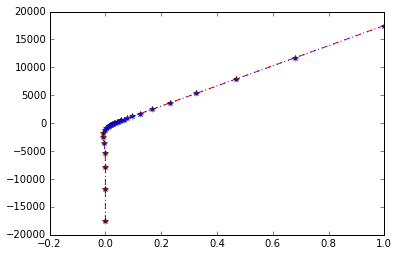

In [27]:
plot(solE.real,M.vectorNx,'r*--',anaEcor.real,M.vectorNx,'b+:')
#axis([-.2,.2,-10000,10000])

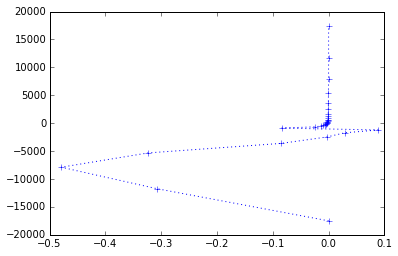

In [28]:
plot((abs(solE.real)-abs(anaEcor.real))/abs(anaEcor.real),M.vectorNx,'b+:')

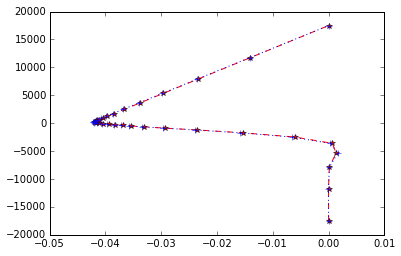

In [29]:
plot(solE.imag,M.vectorNx,'r*--',anaEcor.imag,M.vectorNx,'b+:')

/home/gudni/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


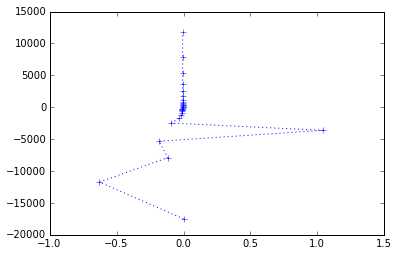

In [30]:
plot((abs(solE.imag)-abs(anaEcor.imag))/abs(anaEcor.imag),M.vectorNx,'b+:')

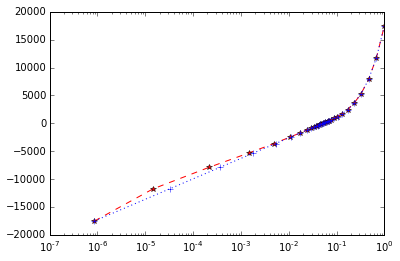

In [31]:
semilogx(abs(solE),M.vectorNx,'r*--',abs(anaEcor),M.vectorNx,'b+:')

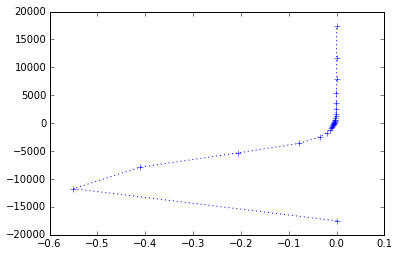

In [32]:
plot((abs(solE)-abs(anaEcor))/abs(anaEcor),M.vectorNx,'b+:')

In [33]:
def appResPhs(freq,z):
    app_res = ((1./(8e-7*np.pi**2))/freq)*np.abs(z)**2
    app_phs = np.arctan2(z.imag,z.real)*(180/np.pi)
    return app_res, app_phs
app_rAna, app_pAna = appResPhs(freq,anaZ)
app_rSol, app_pSol = appResPhs(freq,solE[np.argmin(M.hx**2)]/solH[np.argmin(M.hx**2)])
print app_rAna, app_pAna
print app_rSol, app_pSol

100.0 44.999998407
91.3634893888 -137.014649098


In [34]:
M.nodalGrad.dot(solE).shape

(30,)

In [35]:
M.nN


31

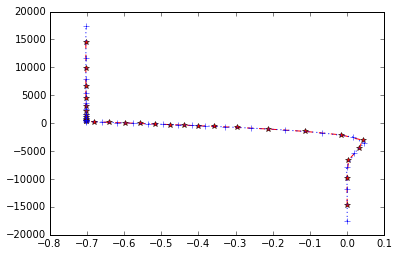

In [36]:
plot(-solH.imag,M.vectorCCx,'r*--',anaHcor.imag,M.vectorNx,'b+:')


In [37]:
M.vectorCCx

array([-14616.25976562,  -9810.83984375,  -6607.2265625 ,  -4471.484375  ,
        -3047.65625   ,  -2098.4375    ,  -1465.625     ,  -1043.75      ,
         -762.5       ,   -575.        ,   -450.        ,   -350.        ,
         -250.        ,   -150.        ,    -50.        ,     50.        ,
          150.        ,    250.        ,    350.        ,    450.        ,
          575.        ,    762.5       ,   1043.75      ,   1465.625     ,
         2098.4375    ,   3047.65625   ,   4471.484375  ,   6607.2265625 ,
         9810.83984375,  14616.25976562])